In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [2]:
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]
print(f'c1: {c1}')
print(f'c2: {c2}')

c1: [0.67857588 0.70073508 0.22023881]
c2: [-0.72817329  0.6811147   0.07646185]


c1 and c2 are unit vector for each of the pricpal components for the 3D dataset

This can then be projected onto a hyperplane to tranform it to 2D space or d-space


In [3]:
W2 = Vt[:2].T
X2D = X_centered @ W2
print(f'old shape: {X_centered.shape}')
print(f'new shape: {X2D.shape}')

old shape: (60, 3)
new shape: (60, 2)


In [4]:
#With sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(f'first 5 rows without sklearn:\n {X2D[:5,:]}')
X2D = pca.fit_transform(X_centered)
print(f'first 5 rows with sklearn:\n {X2D[:5,:]}')

first 5 rows without sklearn:
 [[-0.87323119 -0.29459803]
 [ 0.14888518  0.51493557]
 [ 1.35121872 -0.39950155]
 [ 0.45436676 -0.1399845 ]
 [-0.73438909 -0.02289346]]
first 5 rows with sklearn:
 [[-0.87323119  0.29459803]
 [ 0.14888518 -0.51493557]
 [ 1.35121872  0.39950155]
 [ 0.45436676  0.1399845 ]
 [-0.73438909  0.02289346]]


In [5]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [6]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, X_test = mnist.data[:60000], mnist.data[60_000:]
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

In [8]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [9]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [10]:
pca.n_components_

154

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

clf = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))

params = {
    "pca__n_components": np.arange(10,80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf, params, cv=3, n_iter=10, n_jobs=-1, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491

In [12]:
print(rnd_search.best_estimator_)

Pipeline(steps=[('pca', PCA(n_components=23, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=465, random_state=42))])


In [15]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)
X_reduced

array([[ 123.93258864, -312.67426198,  -24.51405174, ...,  -62.00213296,
          -8.8147422 ,  -66.93993166],
       [1011.71837586, -294.85703831,  596.33956108, ...,  -24.52514836,
          26.58534428,   16.99077095],
       [ -51.84960804,  392.17315289, -188.50974941, ...,   -8.99144972,
          -2.99473092,   56.93622984],
       ...,
       [-178.0534496 ,  160.0782111 , -257.61308227, ...,   35.30439525,
          -2.75142691,   23.97581712],
       [ 130.60607212,   -5.59193632,  513.85867376, ...,  -15.84132904,
         -18.38612585,   39.40742042],
       [-173.43595246,  -24.71880228,  556.01889398, ...,   29.62816702,
         -52.61652274,   27.99524134]])

In [14]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)
X_reduced

array([[ 123.93240015,  312.67412765,   24.51396855, ...,   55.02414967,
         -18.82319306,   57.12605157],
       [1011.71883902,  294.85791533, -596.3396284 , ...,   40.79115354,
         -28.52753525,  -32.93944347],
       [ -51.84977972, -392.17395257,  188.50798593, ...,   18.5109603 ,
         -75.96611653,   -7.67736302],
       ...,
       [-178.0534095 , -160.07838721,  257.61233558, ...,  -57.3811145 ,
           6.70673288,  -54.26797595],
       [ 130.60654125,    5.59174593, -513.85834969, ...,  -22.43044205,
          12.51568244,  -36.3004746 ],
       [-173.43566358,   24.71937319, -556.01892138, ...,  -48.33215133,
          19.2936437 ,  -30.58306681]])

In [16]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train
X_mmap.flush()

In [19]:
X_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1,784)
batch_size = X_mmap.shape[0] #n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)
inc_pca.batch_size_

60000

In [20]:
X_mmap.shape

(60000, 784)

In [24]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, epsilon = 5_000, 0.1 #Where m is the number of features and epsilon is our tolerance of information loss

#make dimensions d be the number of dimenstions is possible to reducce
d = johnson_lindenstrauss_min_dim(m, eps=epsilon)

#show dimensionality before and after using 20,000 features
print(f'Original dimensions: {m*20_000}')
print(f'New dimensions: {d}')

Original dimensions: 100000000
New dimensions: 7300


In [26]:
#example to show this reduction with a random gaussian distributed matrix

#create number of features n
n = 20_000

#create random seed and random matrix P
np.random.seed(42)
P = np.random.rand(d, n) / np.sqrt(d) #std dev = square root of variance

#now create a fake data set that will be matrix multiplied by the P matrix to a reduced matrix

X = np.random.randn(m,n)
X_reduced = X @ P.T

In [29]:
print(f'Old dimensions: {X.shape}\nNew dimensions{X_reduced.shape}')

Old dimensions: (5000, 20000)
New dimensions(5000, 7300)


In [30]:
#another way we can perfrom the cell above is using GaussianRandomProjection class
from sklearn.random_projection import GaussianRandomProjection
gaussian_rand_proj = GaussianRandomProjection(eps=epsilon, random_state=42)
X_reduced = gaussian_rand_proj.fit_transform(X)
#We'll just print the shape to show that change since we already know X is (5000, 20,000)
X_reduced.shape

(5000, 7300)

We can also use the class <span style='color: green; text-decoration: underline'>SparseRandomProjection</span> to get the same dimension reduction with having to do all that processing. It will make a sparse matrix so it uses less data and reduce its dimensionality as well with faster processing times. Use this class before <span style='color: green; text-decoration: underline'>GaussianRandomProjection</span>

In [31]:
"""
This next part deals with LLE or Locally linear embedding. It does not rely on projection and is similar to nearest neighbors
as it kinda uses it for nearest neighbors
"""
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

#import swiss roll in X and y and initiallize lle with n_components and n_neighbors, with a random state of 42
swiss_X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

#convert X to a 2D array using LLE
X_unrolled = lle.fit_transform(swiss_X)

Text(0.5, 1.0, 'Unrolled Swiss Roll Using LLE')

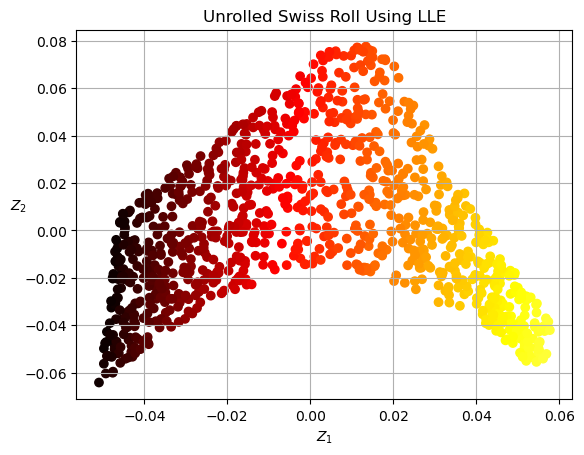

In [45]:
#import matplot lib to start drawing the 2D swiss roll
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#make a colormap to show the difference in class
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))
#uses column 1 as my X and column 2 as my Y from X_rolled
plt.scatter(X_unrolled[:,0], X_unrolled[:,1], c=y, cmap=darker_hot)
#name the X-axis Z_1
plt.xlabel('$Z_1$')
#name the y-axis Z_2
plt.ylabel('$Z_2$', rotation=0)
#add grid
plt.grid(True)
#add title
plt.title("Unrolled Swiss Roll Using LLE")